# LSTM

## Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

## Reading the datasets

In [2]:
train=pd.read_csv('stock train.csv')

In [3]:
test=pd.read_csv('stock test.csv')

In [4]:
train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [5]:
test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


## Preprocessing the train and test set

In [6]:
training_set = train.iloc[:, 1:2].values

In [7]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [9]:
sc = MinMaxScaler()
scaled = sc.fit_transform(training_set)

In [10]:
scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [11]:
xtrain = []
ytrain = []
for i in range(60, len(scaled)):
    xtrain.append(scaled[i-60: i, 0])
    ytrain.append(scaled[i, 0])
xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [12]:
xtrain

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [13]:
ytrain

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [14]:
xtrain.shape[0]

1198

In [15]:
xtrain.shape[1]

60

In [16]:
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))

In [17]:
xtrain

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [18]:
xtrain.shape

(1198, 60, 1)

In [19]:
real = test.iloc[:, 1: 2].values

In [20]:
merge = pd.concat((train['Open'],test['Open']), axis = 0)

In [21]:
merge

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [22]:
inputs =  merge[len(merge)-len(test)- 60: ].values

C:\Users\prash\AppData\Local\Temp\ipykernel_20036\174145298.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs =  merge[len(merge)-len(test)- 60: ].values


In [23]:
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [24]:
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [25]:
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [26]:
xtest = []
for i in range(60, len(inputs)): 
    xtest.append(inputs[i-60: i, 0])
    
xtest = np.array(xtest)
xtest = np.reshape(xtest, newshape = (xtest.shape[0], xtest.shape[1], 1))

In [27]:
xtest

array([[[0.9299055 ],
        [0.93113327],
        [0.92750577],
        ...,
        [0.95725128],
        [0.93796041],
        [0.93688146]],

       [[0.93113327],
        [0.92750577],
        [0.94415507],
        ...,
        [0.93796041],
        [0.93688146],
        [0.92955205]],

       [[0.92750577],
        [0.94415507],
        [0.93876032],
        ...,
        [0.93688146],
        [0.92955205],
        [0.94731751]],

       ...,

       [[0.96054394],
        [0.9371419 ],
        [0.92841729],
        ...,
        [1.01045465],
        [1.02407173],
        [1.03930724]],

       [[0.9371419 ],
        [0.92841729],
        [0.90804747],
        ...,
        [1.02407173],
        [1.03930724],
        [1.03354044]],

       [[0.92841729],
        [0.90804747],
        [0.8771858 ],
        ...,
        [1.03930724],
        [1.03354044],
        [0.99624228]]])

In [28]:
xtest.shape

(20, 60, 1)

## Making a triangle based model

In [30]:
regressor = Sequential()

regressor.add(LSTM(units = 45, return_sequences = True, input_shape = (xtrain.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

regressor.add(LSTM(units = 35, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

regressor.add(LSTM(units = 25, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

regressor.add(LSTM(units = 15, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

regressor.add(LSTM(units = 5, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

regressor.add(Dense(units = 1))

In [31]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [32]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 45)            8460      
                                                                 
 dropout (Dropout)           (None, 60, 45)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 35)            11340     
                                                                 
 dropout_1 (Dropout)         (None, 60, 35)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 25)            6100      
                                                                 
 dropout_2 (Dropout)         (None, 60, 25)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 15)            2

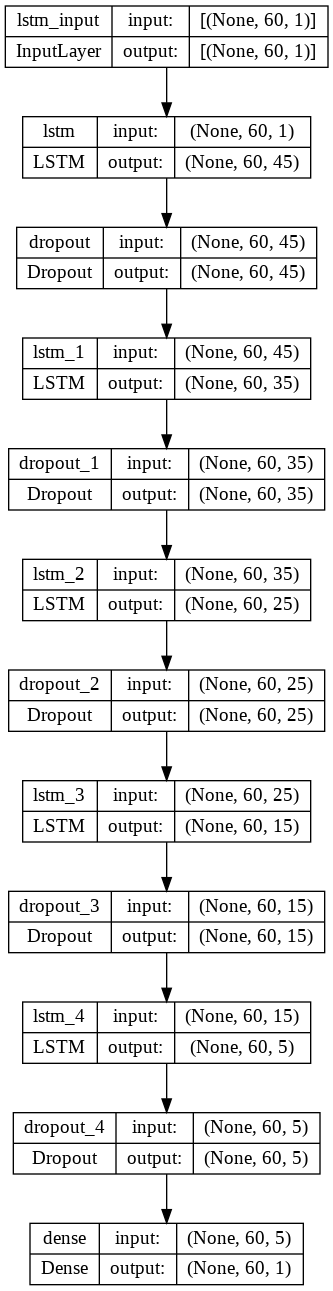

In [33]:
regressor.fit(xtrain, ytrain, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 10s 28ms/step - loss: 0.0917
Epoch 2/100
38/38 [==============================] - 1s 24ms/step - loss: 0.0238
Epoch 3/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0208
Epoch 4/100
38/38 [==============================] - 1s 24ms/step - loss: 0.0204
Epoch 5/100
38/38 [==============================] - 1s 23ms/step - loss: 0.0180
Epoch 6/100
38/38 [==============================] - 1s 23ms/step - loss: 0.0173
Epoch 7/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0160
Epoch 8/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0160
Epoch 9/100
38/38 [==============================] - 1s 23ms/step - loss: 0.0170
Epoch 10/100
38/38 [==============================] - 1s 23ms/step - loss: 0.0129
Epoch 11/100
38/38 [==============================] - 1s 23ms/step - loss: 0.0143
Epoch 12/100
38/38 [==============================] - 1s 23ms/step - loss: 0.0123
Epoch 13/100
38/38 [====

In [34]:
pred = regressor.predict(xtest)

1/1 [==============================] - 1s 1s/step


In [35]:
pred = sc.inverse_transform(pred)

In [36]:
pred

array([[761.40063],
       [761.0365 ],
       [760.2335 ],
       [759.2694 ],
       [758.6787 ],
       [759.08325],
       [760.7983 ],
       [763.5262 ],
       [766.5242 ],
       [768.994  ],
       [770.41724],
       [770.7154 ],
       [770.2252 ],
       [769.55963],
       [769.30505],
       [769.9548 ],
       [771.7728 ],
       [774.691  ],
       [778.19226],
       [781.26697]], dtype=float32)

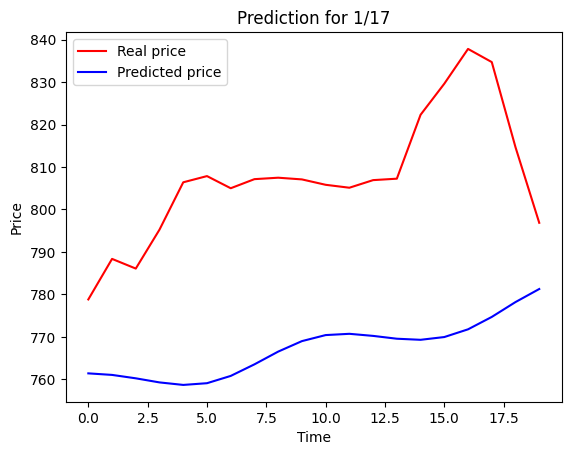

In [37]:
plt.plot(real, color = 'red', label = 'Real price')
plt.plot(pred, color = 'blue', label = 'Predicted price')
plt.title('Prediction for 1/17')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Does not give a very good prediction

---
## Rectangle based model

In [38]:
regressor1 = Sequential()

regressor1.add(LSTM(units = 45, return_sequences = True, input_shape = (xtrain.shape[1], 1)))
regressor1.add(Dropout(rate = 0.2))

regressor1.add(LSTM(units = 45, return_sequences = True))
regressor1.add(Dropout(rate = 0.2))

regressor1.add(LSTM(units = 45, return_sequences = True))
regressor1.add(Dropout(rate = 0.2))

regressor1.add(LSTM(units = 45, return_sequences = True))
regressor1.add(Dropout(rate = 0.2))

regressor1.add(LSTM(units = 45, return_sequences = False))
regressor1.add(Dropout(rate = 0.2))

regressor1.add(Dense(units = 1))

In [39]:
regressor1.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [40]:
regressor1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 60, 45)            8460      
                                                                 
 dropout_5 (Dropout)         (None, 60, 45)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 45)            16380     
                                                                 
 dropout_6 (Dropout)         (None, 60, 45)            0         
                                                                 
 lstm_7 (LSTM)               (None, 60, 45)            16380     
                                                                 
 dropout_7 (Dropout)         (None, 60, 45)            0         
                                                                 
 lstm_8 (LSTM)               (None, 60, 45)           

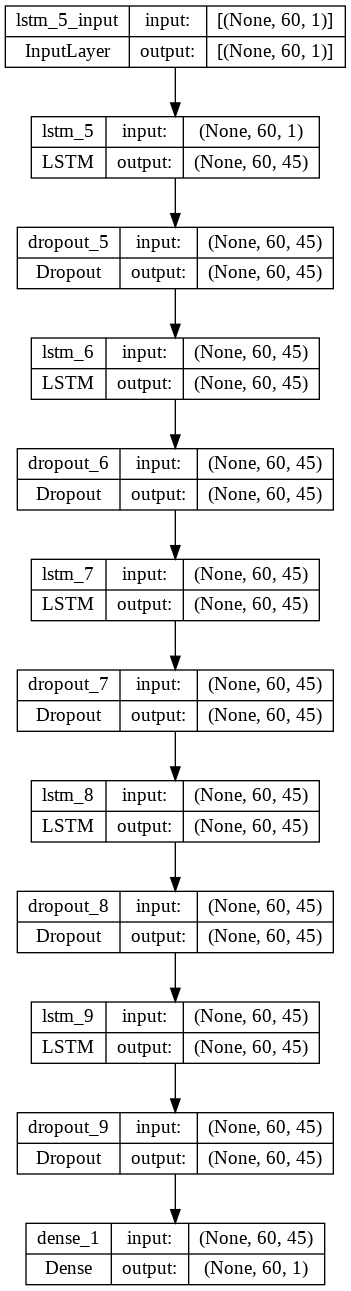

In [41]:
regressor1.fit(xtrain, ytrain, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 5s 26ms/step - loss: 0.0404
Epoch 2/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0074
Epoch 3/100
38/38 [==============================] - 1s 23ms/step - loss: 0.0065
Epoch 4/100
38/38 [==============================] - 1s 24ms/step - loss: 0.0068
Epoch 5/100
38/38 [==============================] - 1s 26ms/step - loss: 0.0062
Epoch 6/100
38/38 [==============================] - 1s 25ms/step - loss: 0.0053
Epoch 7/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0054
Epoch 8/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0065
Epoch 9/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0054
Epoch 10/100
38/38 [==============================] - 1s 23ms/step - loss: 0.0054
Epoch 11/100
38/38 [==============================] - 1s 23ms/step - loss: 0.0048
Epoch 12/100
38/38 [==============================] - 1s 24ms/step - loss: 0.0047
Epoch 13/100
38/38 [=====

In [50]:
pred1 = regressor1.predict(xtest)

1/1 [==============================] - 1s 976ms/step


In [51]:
pred1

array([[0.95103717],
       [0.94691336],
       [0.9451058 ],
       [0.94545686],
       [0.94871247],
       [0.9557165 ],
       [0.96376634],
       [0.96896875],
       [0.9710082 ],
       [0.97113025],
       [0.97058535],
       [0.9699862 ],
       [0.969677  ],
       [0.9703698 ],
       [0.9719963 ],
       [0.97762716],
       [0.98717844],
       [0.99873614],
       [1.0074759 ],
       [1.0067083 ]], dtype=float32)

In [52]:
pred1 = sc.inverse_transform(pred1)

In [53]:
pred1

array([[790.3595 ],
       [788.1427 ],
       [787.171  ],
       [787.35974],
       [789.10986],
       [792.87494],
       [797.2022 ],
       [799.99884],
       [801.09515],
       [801.16077],
       [800.86786],
       [800.5458 ],
       [800.3795 ],
       [800.75195],
       [801.6263 ],
       [804.65326],
       [809.7876 ],
       [816.00055],
       [820.69867],
       [820.2861 ]], dtype=float32)

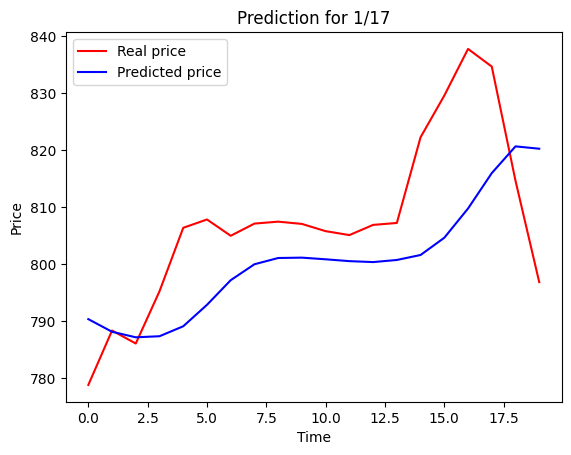

In [55]:
plt.plot(real, color = 'red', label = 'Real price')
plt.plot(pred1, color = 'blue', label = 'Predicted price')
plt.title('Prediction for 1/17')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Gives a slightly more accurate model, however it fails to pick up on the trend

### if we add mpre epochs then maybe the model can perform better